In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
angles = pd.read_csv("angles.csv")
t3_10 = [16.82, 16.87, 16.75]
t3_10_mean = sum(t3_10) / 3
T3 = t3_10_mean / 10
angles

,angle,t_1,t_2,t_3
0,25,42.44,40.73,50.51
1,20,95.99,97.94,105.49
2,15,159.28,157.68,170.66
3,10,235.70,233.15,242.23
4,5,317.74,314.76,320.43


In [3]:
xy = pd.concat([angles[["angle", f"t_{e}"]].rename(columns={"angle": "y", f"t_{e}": "x"}) for e in range(1, 4)])
# xy.to_numpy()
# plt.scatter(xy["x"], xy["y"])
# plt

In [4]:
# Ну вообще довольно сухое трение, на линию похоже 
reg = LinearRegression(fit_intercept=False).fit(xy["x"].to_numpy().reshape((-1, 1)), (xy["y"] - 30).to_numpy())
slope = reg.coef_[0]
# delta_phi = -slope / (angles[angles["angle"] == 25].iloc[0, 1:4].mean() / T3) / 4
delta_phi = -slope * T3 / 4
delta_phi

0.03512693256326928

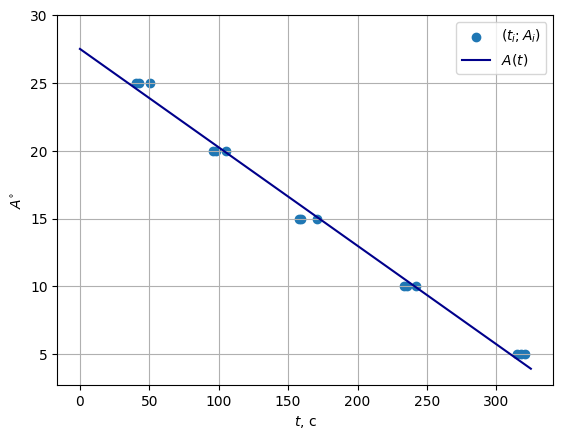

In [5]:
plt.scatter(xy["x"], xy["y"], label=r"$(t_i; A_i)$")
reg = LinearRegression().fit(xy["x"].to_numpy().reshape((-1, 1)), (xy["y"]).to_numpy())
slope1, intercept1 = reg.coef_[0], reg.intercept_
plt.plot(np.arange(0, 325, 0.1), np.arange(0, 325, 0.1) * slope1 + intercept1, color="darkblue", label=r"$A(t)$")
plt.yticks([5, 10, 15, 20, 25, 30])
plt.xlabel(r"$t$" + ", с")
plt.ylabel(r"$A$" + r"$^{\circ}$")
plt.grid()
plt.legend()

In [6]:
-30 / slope / T3

213.51138436273334

In [7]:
weights = pd.read_csv("weights.csv")
weights

,t_1,t_2,t_3
0,15.91,15.86,16.40
1,16.82,16.87,16.75
2,17.78,18.04,17.96
3,19.03,19.36,19.09
4,20.25,20.40,20.92
5,21.89,21.83,21.74


In [8]:
R_up = (57.5 + 40 / 2) / 1000
R_side = np.array([(57.5 + e * 25 + 40 / 2) / 1000 for e in range(6)])
R_down = (57.5 + 5 * 25 + 40 / 2) / 1000
I_weights = 0.408 * (R_up ** 2 + 2 * R_side ** 2 + R_down ** 2)
I = I_weights + 8 * 10 ** -3
I

array([0.0320822, 0.0357542, 0.0404462, 0.0461582, 0.0528902, 0.0606422])

In [9]:
print(*[round(i, 3) for i in I], sep="\t")

0.032	0.036	0.04	0.046	0.053	0.061


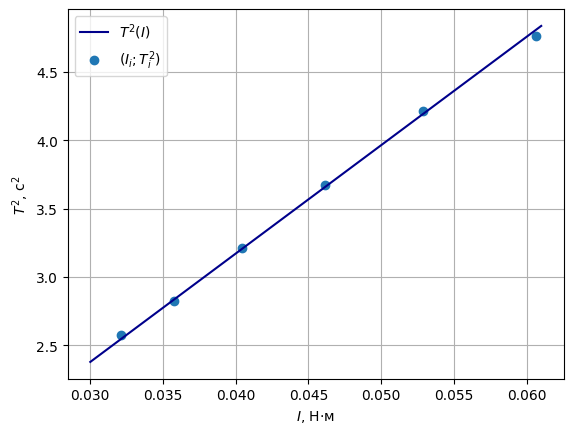

In [10]:
T_sq = (weights.mean(axis=1) / 10) ** 2

reg = LinearRegression(fit_intercept=False).fit(I.reshape((-1, 1)), T_sq.to_numpy())

slope = reg.coef_[0]

plt.plot(np.arange(0.03, 0.062, 0.001), np.arange(0.03, 0.062, 0.001) * reg.coef_[0] + reg.intercept_, color="darkblue", label=r"$T^2(I)$")
plt.scatter(I, T_sq, label=r"$(I_i; T^2_i)$")
plt.grid()
plt.xlabel(r"$I$" + ", Н" + r"$\cdot$" + "м")
plt.ylabel(r"$T^2$" + ", c" + r"$^2$")
plt.legend()

In [11]:
l_theor = (R_down - R_up) / 4

In [12]:
l_theor

0.03125

In [13]:
import math

ml = 4 * math.pi ** 2 / 9.8 / slope 
ml

0.05082077365958073

In [14]:
l_adj_exp = T_sq * 9.8 / 4 / math.pi ** 2 
l_adj_exp

0    0.639996
1    0.701736
2    0.797747
3    0.911292
4    1.045592
5    1.181887
dtype: float64

In [15]:
l_adj_theor = (R_up ** 2 + 2 * R_side ** 2 + R_down ** 2) / (R_down - R_up)
l_adj_theor

array([0.4722, 0.5442, 0.6362, 0.7482, 0.8802, 1.0322])

In [16]:
print(*[round(i, 2) for i in l_adj_exp], sep="\t")

0.64	0.7	0.8	0.91	1.05	1.18


In [17]:
print(*[round(i, 2) for i in l_adj_theor], sep="\t")

0.47	0.54	0.64	0.75	0.88	1.03


In [18]:
(l_adj_exp / l_adj_theor).mean()

1.2416091949678443